In [1]:
#import gzip
import os  # Using orjson for faster JSON parsing
from datetime import datetime, timedelta
import json
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import math

### **Sampling**

In [5]:
with open(r'C:\Users\marco\OneDrive\Desktop\ADV Project\Datasets\all-en.jsonl', "r", encoding="utf-8") as file:
    lines = file.readlines()

# Step 2: Randomly sample 100 lines
sampled_lines = random.sample(lines, min(len(lines), 100))

# Step 3: Save the sampled lines to a new JSONL file (optional)
output_file = "sampled_file.jsonl"
with open(output_file, "w", encoding="utf-8") as file:
    file.writelines(sampled_lines)

print(f"Sampled lines saved to {output_file}")


Sampled lines saved to sampled_file.jsonl


### **Extracting Text**

In [2]:
texts = []  # To store extracted post_id and text

with open(r'C:\Users\marco\OneDrive\Desktop\ADV Project\NLP_BS\sampled_file.jsonl', "r", encoding="utf-8") as file:
    for line in file:
        # Parse each line as a JSON object
        try:
            json_obj = json.loads(line)
            # Extract post_id and text fields
            post_id = json_obj.get("post_id")
            text = json_obj.get("text")
            if post_id is not None and text is not None:
                texts.append({"post_id": post_id, "text": text})
        except json.JSONDecodeError:
            print(f"Skipping invalid JSON line: {line.strip()}")

# Step 2: Save or print the extracted fields
output_file = "extracted_texts_and_ids.jsonl"
with open(output_file, "w", encoding="utf-8") as outfile:
    for item in texts:
        outfile.write(json.dumps(item) + "\n")

print(f"Extracted data saved to {output_file}")

Extracted data saved to extracted_texts_and_ids.jsonl


In [5]:
print(texts)

[{'post_id': 52148188, 'text': 'Idea for @@2042: put something in this menu that lets you get notifications for any post in the thread. Something like “follow this thread”. Instant hellthread for anyone that wants in.'}, {'post_id': 140842427, 'text': 'In JPEG’s we trust'}, {'post_id': 207535158, 'text': 'eu to bem baby e vc? 💛'}, {'post_id': 37509463, 'text': 'Lfg'}, {'post_id': 115480696, 'text': 'Okay, and skeeting means you’re jizzing on something or someone'}, {'post_id': 36831916, 'text': 'gm'}, {'post_id': 30747059, 'text': 'omg wait are u in seattle / wanna go to the mountains sometime? i can bring a mushroom book and we can id mushies!'}, {'post_id': 145990664, 'text': "*taps sign*\n\nPlz don't beg people to show you their butts at their workplace y'all it's weird"}, {'post_id': 121371095, 'text': 'I like'}, {'post_id': 137359465, 'text': 'PROTOMOOMINS\n\nthis is amazing\n\nthx!!!'}, {'post_id': 98846314, 'text': 'Morning 6km run in Wellington. I’m not fit enough for the hills

### **SpaCy preprocessing**

In [3]:
import spacy

In [4]:
# Load SpaCy language model
nlp = spacy.load("en_core_web_md")

In [5]:
# Process each text and extract tokens
tokenized_texts = []

for item in texts:
    post_id = item['post_id']
    text = item['text']
    
    # Process the text with SpaCy
    doc = nlp(text)
    
    # Extract tokens including punctuation
    tokens = [token.text for token in doc]
    
    # Append the result to the list
    tokenized_texts.append({"post_id": post_id, "tokens": tokens})

# Save the tokenized data to a JSONL file
output_file = "tokenized_sample_texts.jsonl"
with open(output_file, "w", encoding="utf-8") as outfile:
    for item in tokenized_texts:
        outfile.write(json.dumps(item) + "\n")

print(f"Tokenized data saved to {output_file}")

Tokenized data saved to tokenized_sample_texts.jsonl


# **Linguistic Analysis**

## POS analysis

POS Distribution: [('NOUN', 344), ('VERB', 254), ('PRON', 227), ('PUNCT', 209), ('ADP', 170), ('DET', 135), ('AUX', 131), ('PROPN', 111), ('ADJ', 109), ('ADV', 88), ('PART', 59), ('CCONJ', 44), ('SCONJ', 42), ('NUM', 34), ('SPACE', 30), ('INTJ', 17), ('SYM', 7), ('X', 7)]


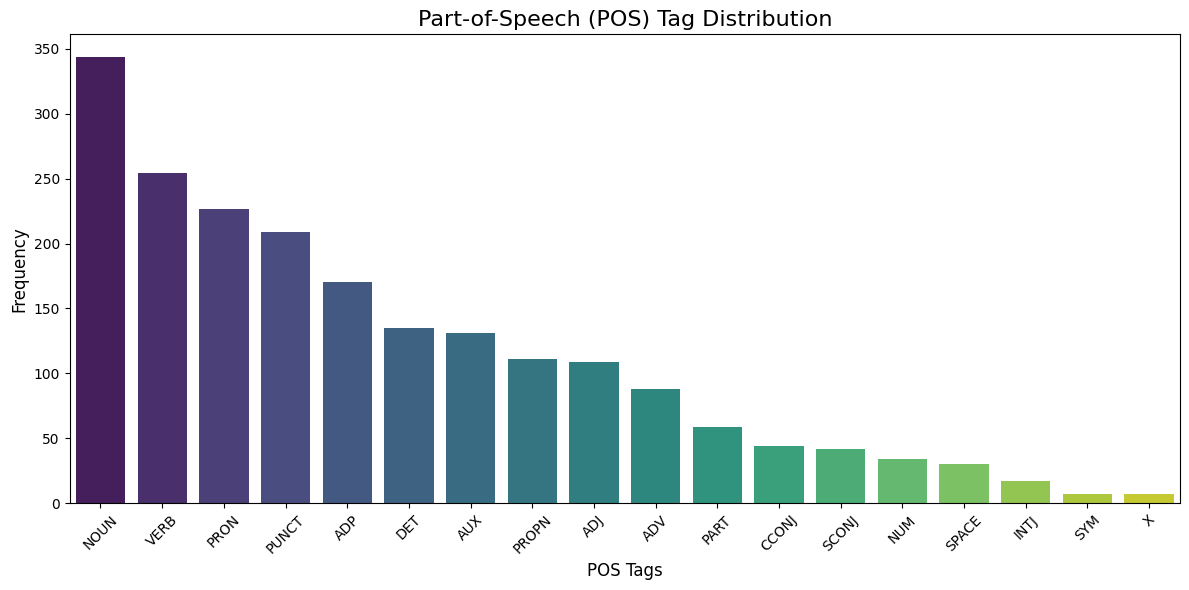

In [8]:
# Calculate POS distribution
from collections import Counter

pos_counts = Counter()
for item in tokenized_texts:
    doc = nlp(" ".join(item["tokens"]))
    pos_counts.update([token.pos_ for token in doc])

# Display the most common POS tags
print("POS Distribution:", pos_counts.most_common())

# Function to visualize POS distribution
def visualize_pos_distribution(pos_counts):
    # Extract POS tags and their counts
    pos_tags, counts = zip(*pos_counts.most_common())
    
    # Create a DataFrame for seaborn compatibility
    import pandas as pd
    pos_data = pd.DataFrame({"POS Tag": pos_tags, "Frequency": counts})
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=pos_data, x="POS Tag", y="Frequency", palette="viridis", hue="POS Tag", dodge=False, legend=False)
    
    # Add titles and labels
    plt.title("Part-of-Speech (POS) Tag Distribution", fontsize=16)
    plt.xlabel("POS Tags", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_pos_distribution(pos_counts)

### POS Transition Patterns

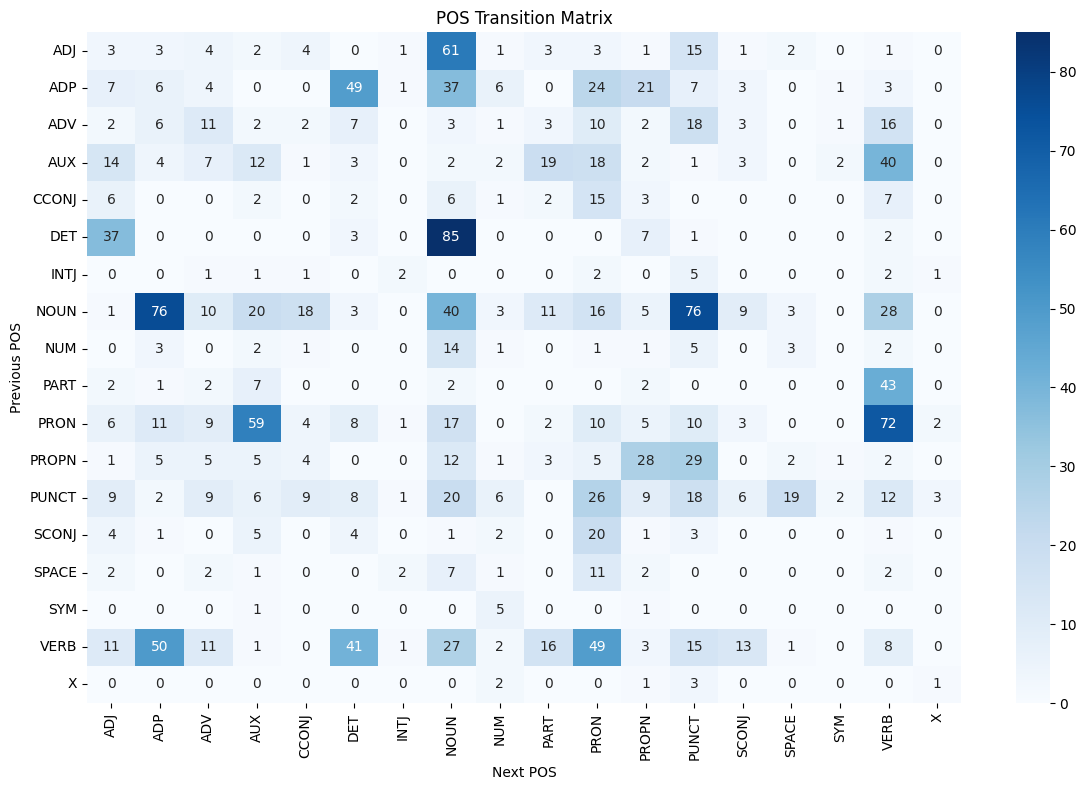

In [18]:
pos_transitions = Counter()
for item in tokenized_texts:
    doc = nlp(" ".join(item["tokens"]))
    pos_tags = [token.pos_ for token in doc]
    pos_transitions.update(zip(pos_tags[:-1], pos_tags[1:]))

# Create a DataFrame for heatmap
pos_df = pd.DataFrame(pos_transitions.most_common(), columns=["Transition", "Frequency"])
pos_df[["POS1", "POS2"]] = pd.DataFrame(pos_df["Transition"].tolist(), index=pos_df.index)

# Ensure the pivot table values are integers
pos_pivot = pos_pivot.astype(int)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pos_pivot, annot=True, fmt="d", cmap="Blues")  # "d" now works because values are integers
plt.title("POS Transition Matrix")
plt.xlabel("Next POS")
plt.ylabel("Previous POS")
plt.tight_layout()
plt.show()


## Lexical Diversity

Post ID 52148188 - Lexical Diversity: 0.76
Post ID 140842427 - Lexical Diversity: 1.00
Post ID 207535158 - Lexical Diversity: 1.00
Post ID 37509463 - Lexical Diversity: 1.00
Post ID 115480696 - Lexical Diversity: 1.00
Post ID 36831916 - Lexical Diversity: 1.00
Post ID 30747059 - Lexical Diversity: 0.93
Post ID 145990664 - Lexical Diversity: 0.91
Post ID 121371095 - Lexical Diversity: 1.00
Post ID 137359465 - Lexical Diversity: 0.70
Post ID 98846314 - Lexical Diversity: 1.00
Post ID 104849450 - Lexical Diversity: 1.00
Post ID 57964933 - Lexical Diversity: 0.96
Post ID 73249599 - Lexical Diversity: 0.89
Post ID 38896598 - Lexical Diversity: 0.86
Post ID 46775960 - Lexical Diversity: 1.00
Post ID 138476505 - Lexical Diversity: 0.90
Post ID 123257773 - Lexical Diversity: 1.00
Post ID 209208385 - Lexical Diversity: 0.86
Post ID 5256063 - Lexical Diversity: 1.00
Post ID 153878113 - Lexical Diversity: 0.91
Post ID 143007664 - Lexical Diversity: 0.88
Post ID 139823221 - Lexical Diversity: 1.00

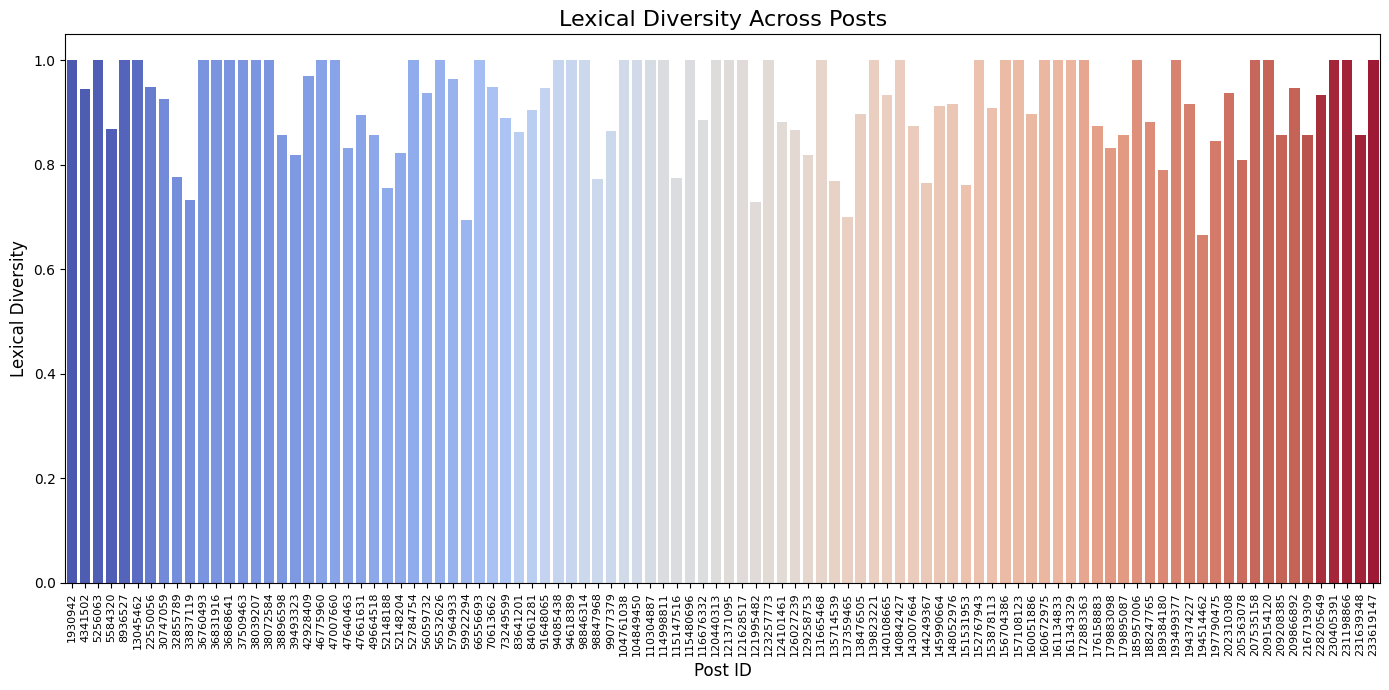

In [12]:
# Calculate lexical diversity
for item in tokenized_texts:
    tokens = item["tokens"]
    unique_tokens = set(tokens)
    lexical_diversity = len(unique_tokens) / len(tokens) if tokens else 0
    print(f"Post ID {item['post_id']} - Lexical Diversity: {lexical_diversity:.2f}")
    
# Calculate lexical diversity for each post
lexical_diversity_data = []
for item in tokenized_texts:
    tokens = item["tokens"]
    unique_tokens = set(tokens)
    lexical_diversity = len(unique_tokens) / len(tokens) if tokens else 0
    lexical_diversity_data.append({"post_id": item["post_id"], "lexical_diversity": lexical_diversity})

# Convert to a DataFrame for easier visualization
lexical_df = pd.DataFrame(lexical_diversity_data)

# Sort by lexical diversity for better visualization
lexical_df = lexical_df.sort_values(by="lexical_diversity", ascending=False)

# Create the plot
plt.figure(figsize=(14, 7))
sns.barplot(data=lexical_df, x="post_id", y="lexical_diversity", palette="coolwarm", hue="post_id", legend=False)

# Customize the plot
plt.title("Lexical Diversity Across Posts", fontsize=16)
plt.xlabel("Post ID", fontsize=12)
plt.ylabel("Lexical Diversity", fontsize=12)
plt.xticks(rotation=90, fontsize=8)  # Rotate Post IDs for better readability

# Display the plot
plt.tight_layout()
plt.show()


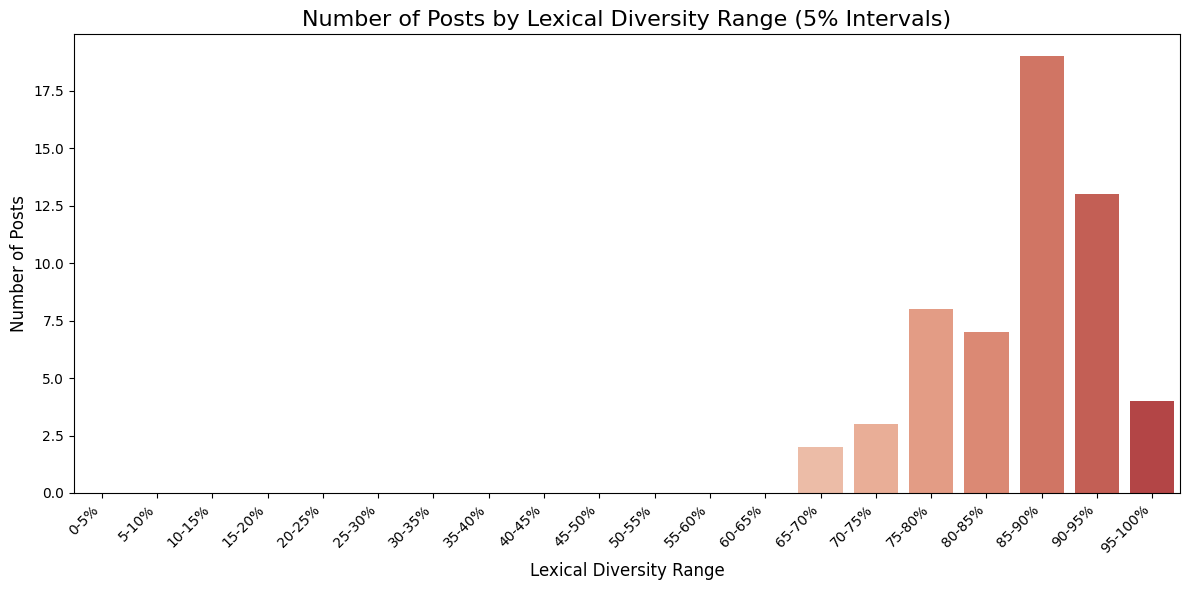

In [10]:
# Create bins for lexical diversity with 5% intervals
lexical_df['diversity_range'] = pd.cut(
    lexical_df['lexical_diversity'],
    bins=[i/100 for i in range(0, 101, 5)],  # Bins from 0% to 100% in 5% increments
    right=False,  # Include the left edge, exclude the right
    labels=[f"{i}-{i+5}%" for i in range(0, 95, 5)] + ['95-100%']  # Custom labels for bins
)

# Count the number of posts in each range
diversity_counts = lexical_df['diversity_range'].value_counts().sort_index()

# Create a bar plot for diversity ranges
plt.figure(figsize=(12, 6))
sns.barplot(
    x=diversity_counts.index,
    y=diversity_counts.values,
    palette="coolwarm",
    hue=diversity_counts.index,
    dodge=False,
    legend=False
)

# Customize the plot
plt.title("Number of Posts by Lexical Diversity Range (5% Intervals)", fontsize=16)
plt.xlabel("Lexical Diversity Range", fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


## Dependecies

In [9]:
# Analyze dependency parsing
for item in tokenized_texts[:5]:  # Limit to a few samples for readability
    doc = nlp(" ".join(item["tokens"]))
    print(f"Post ID {item['post_id']} - Dependency Tree:")
    for token in doc:
        print(f"{token.text} -> {token.head.text} ({token.dep_})")

Post ID 52148188 - Dependency Tree:
Idea -> put (nsubj)
for -> Idea (prep)
@@2042 -> for (pobj)
: -> put (punct)
put -> put (ROOT)
something -> put (dobj)
in -> put (prep)
this -> menu (det)
menu -> in (pobj)
that -> lets (nsubj)
lets -> menu (relcl)
you -> get (nsubj)
get -> lets (ccomp)
notifications -> get (dobj)
for -> notifications (prep)
any -> post (det)
post -> for (pobj)
in -> post (prep)
the -> thread (det)
thread -> in (pobj)
. -> put (punct)
Something -> Something (ROOT)
like -> follow (mark)
“ -> follow (punct)
follow -> Something (acl)
this -> thread (det)
thread -> follow (dobj)
” -> follow (punct)
. -> Something (punct)
Instant -> hellthread (amod)
hellthread -> hellthread (ROOT)
for -> hellthread (prep)
anyone -> for (pobj)
that -> wants (nsubj)
wants -> anyone (relcl)
in -> wants (advmod)
. -> hellthread (punct)
Post ID 140842427 - Dependency Tree:
In -> ’s (prep)
JPEG -> In (pobj)
’s -> ’s (ROOT)
we -> trust (nsubj)
trust -> ’s (ccomp)
Post ID 207535158 - Dependency 

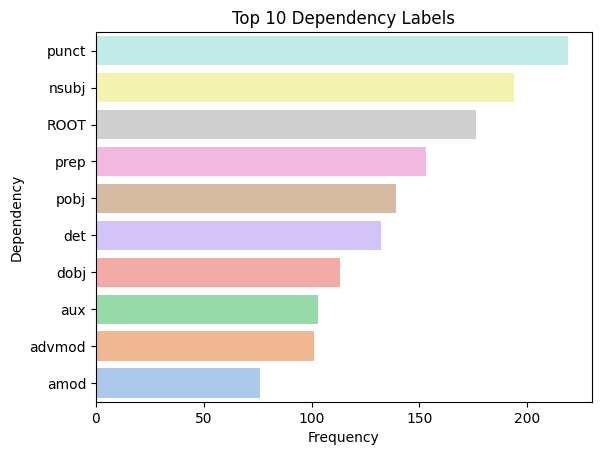

In [21]:
from collections import Counter

dependency_counts = Counter()
for item in tokenized_texts:
    doc = nlp(" ".join(item["tokens"]))
    dependency_counts.update([token.dep_ for token in doc])

# Convert to DataFrame and visualize
dependency_df = pd.DataFrame(dependency_counts.most_common(10), columns=["Dependency", "Frequency"])
sns.barplot(data=dependency_df, x="Frequency", y="Dependency", palette="pastel", hue='Frequency', legend=False)
plt.title("Top 10 Dependency Labels")
plt.xlabel("Frequency")
plt.ylabel("Dependency")
plt.show()

# **Statistical Analysis**

Most Common Words (Excluding Punctuation): [('the', 59), ('to', 43), ('I', 38), ('a', 34), ('of', 32), ('in', 31), ('and', 31), ('you', 27), ('it', 26), ('is', 25)]


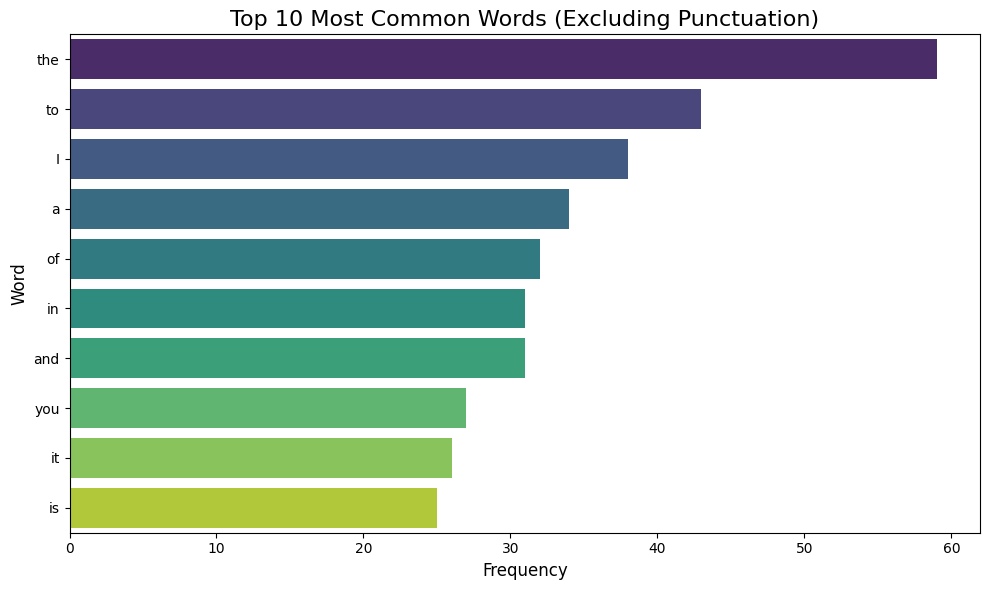

In [14]:
from collections import Counter
import string

# Remove punctuation from tokens
word_counts = Counter()
for item in tokenized_texts:
    filtered_tokens = [token for token in item["tokens"] if token not in string.punctuation]
    word_counts.update(filtered_tokens)

# Display the most common words
print("Most Common Words (Excluding Punctuation):", word_counts.most_common(10))

# Convert the word counts to a DataFrame for visualization
common_words_df = pd.DataFrame(word_counts.most_common(10), columns=["Word", "Frequency"])

# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Frequency", 
    y="Word", 
    data=common_words_df, 
    palette="viridis", 
    hue="Word", 
    dodge=False, 
    legend=False
)

# Customize the plot
plt.title("Top 10 Most Common Words (Excluding Punctuation)", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.tight_layout()
plt.show()



## Sentence Complexity

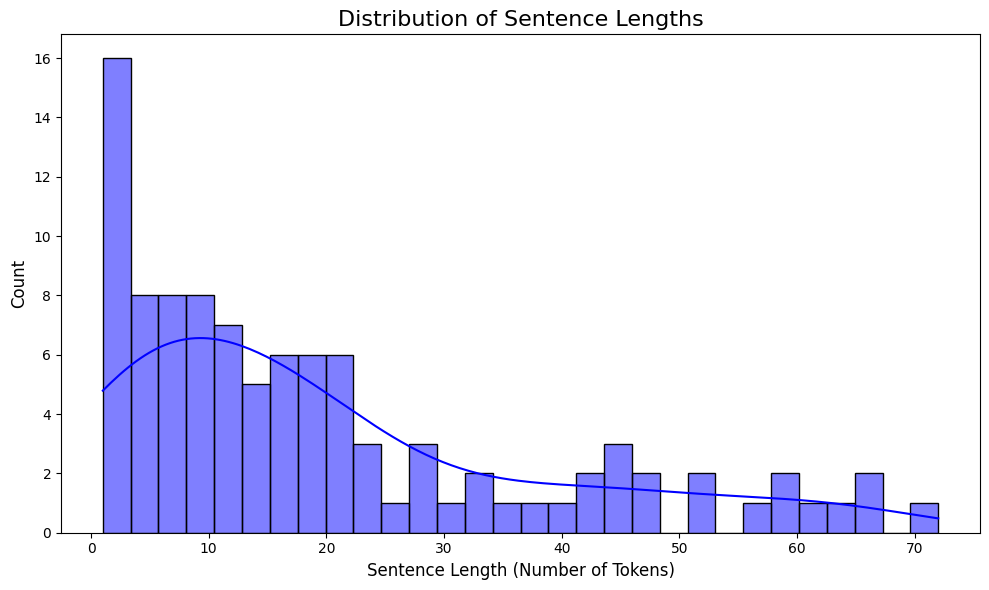

Average Sentence Length: 20.05


In [16]:
sentence_lengths = [len(item["tokens"]) for item in tokenized_texts]

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
sns.histplot(
    sentence_lengths, 
    bins=30, 
    kde=True, 
    color="blue", 
    stat="count"
)

# Customize the plot
plt.title("Distribution of Sentence Lengths", fontsize=16)
plt.xlabel("Sentence Length (Number of Tokens)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# Calculate and display average sentence length
average_sentence_length = sum(sentence_lengths) / len(sentence_lengths)
print(f"Average Sentence Length: {average_sentence_length:.2f}")


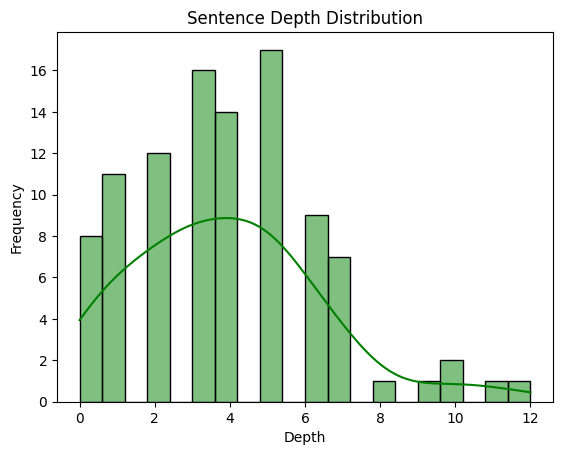

In [23]:
sentence_depths = []
for item in tokenized_texts:
    doc = nlp(" ".join(item["tokens"]))
    depths = [len(list(token.ancestors)) for token in doc]
    sentence_depths.append(max(depths) if depths else 0)

# Visualize sentence depth distribution
sns.histplot(sentence_depths, bins=20, kde=True, color="green")
plt.title("Sentence Depth Distribution")
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.show()

In [12]:
import math

# Calculate entropy
total_tokens = sum(word_counts.values())
entropy = -sum((count / total_tokens) * math.log2(count / total_tokens) for count in word_counts.values())
print(f"Entropy: {entropy:.2f}")

Entropy: 8.72
